# Assignment 1
## Part B - Facebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep = ';')

#### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [4]:
attributes = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid']
outcomes = ['Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions']

There are missing values in 'Paid', 'like' and 'share' which will be filled later. "Type", "Category", "Post Month", "Post Weekday", "Post Hour" and "Paid" are category variables and will be converted.

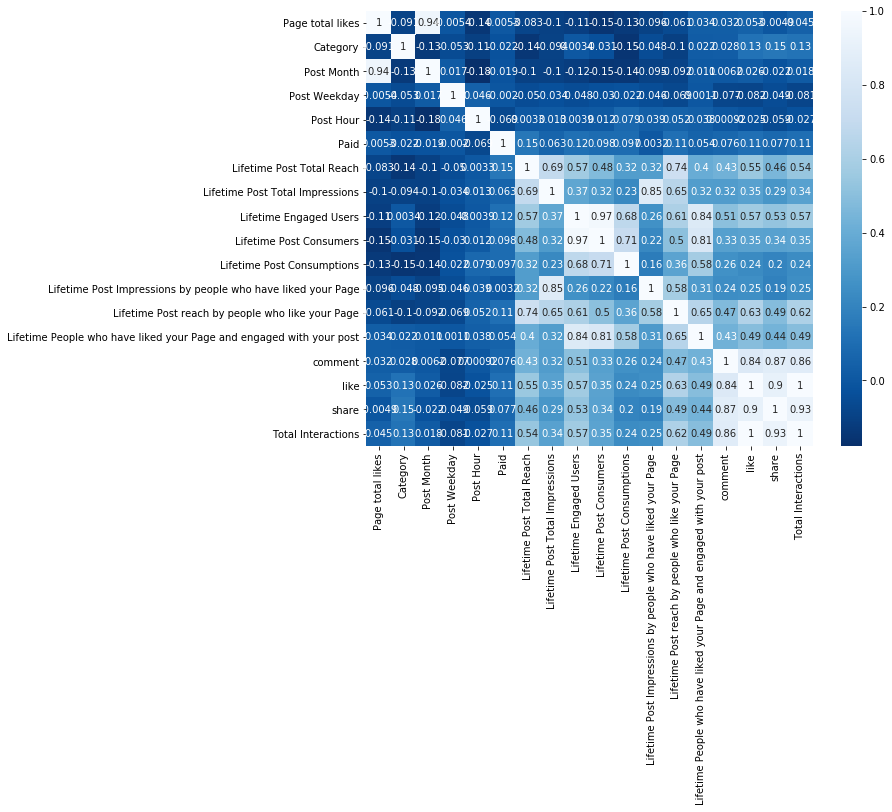

In [5]:
numerical_columns  = df.select_dtypes(include=[np.number]).columns.tolist()
correlation = pd.DataFrame.corr(df[numerical_columns])

fig, ax = plt.subplots(figsize=(10,8))
fig = sns.heatmap(correlation, cmap="Blues_r", annot=True)

There appears to be low correlation between the numerical input "Page total likes" with the outputs. 

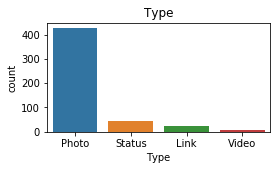

In [6]:
#visualize prevalence of values for each variable
for col in df.select_dtypes(exclude=[np.number]).columns.tolist():
    plt.figure(figsize=(4,2))
    sns.countplot(df[col])
    plt.title(col)

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


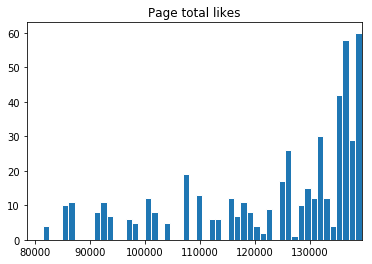

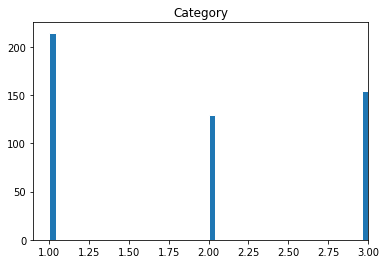

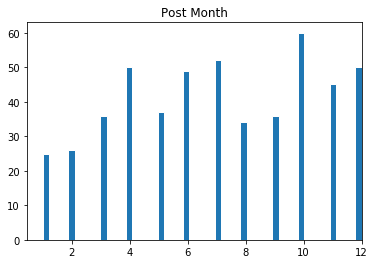

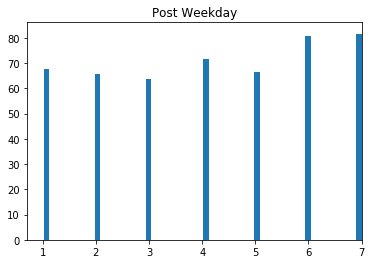

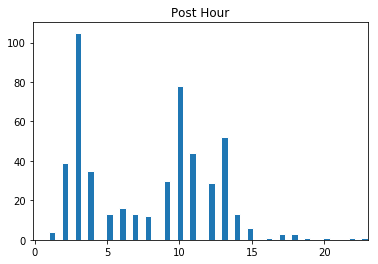

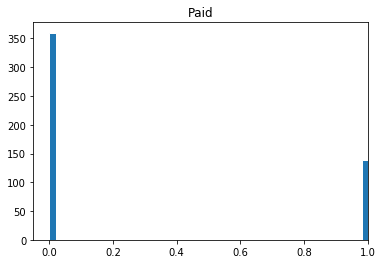

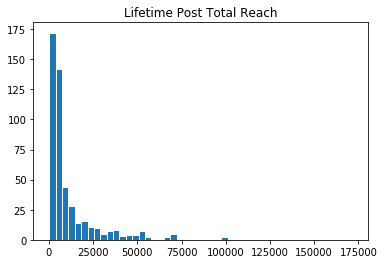

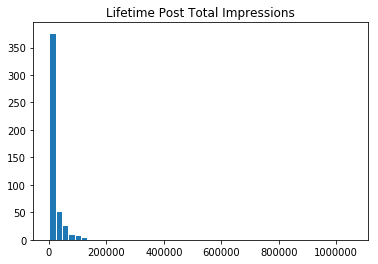

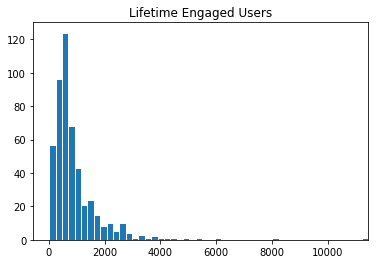

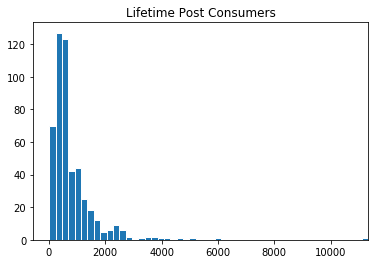

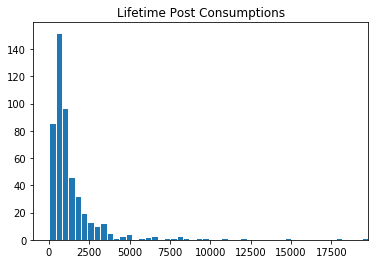

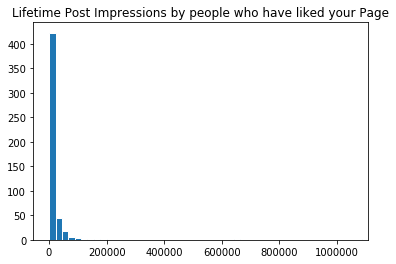

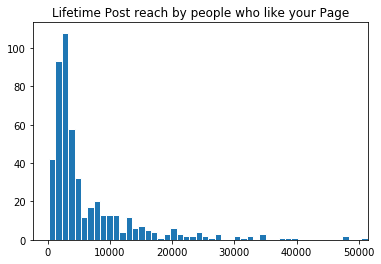

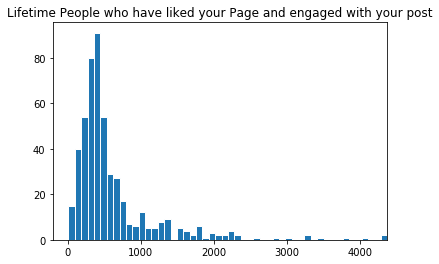

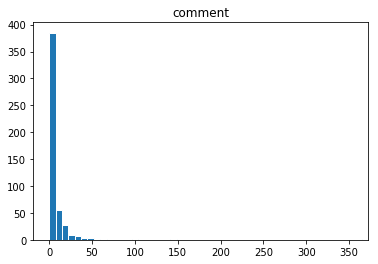

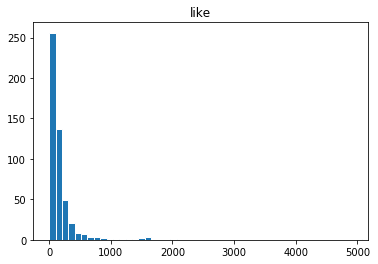

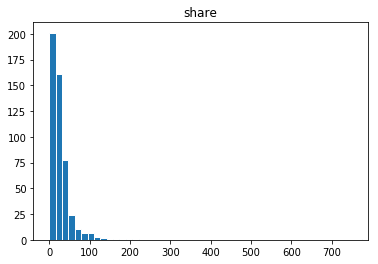

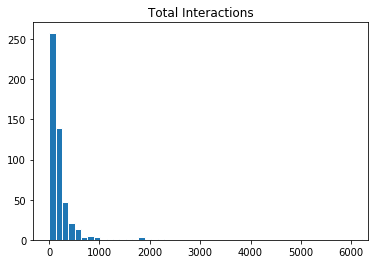

In [7]:
#visualize distributions of numerical variables
for col in df.select_dtypes(include=[np.number]).columns.tolist():
    fig, ax = plt.subplots()
    fig = plt.hist(df[col], bins=50, edgecolor='white')
    ax.set_xlim(right=df[col].max())
    plt.title(col)

In [8]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Two output variables are selected for analysis for the purpose of this notebook. Based on the earlier visualizations, the distributions of the output variables are extremely right skewed. To get some intuition on how the outcomes might vary with different input variables, extreme outliers are excluded in the visualization.

Two output variables were selected for analysis:'Lifetime Post Consumers', 'Lifetime Engaged Users'

In [9]:
selected_outcomes = ['Lifetime Post Consumers', 'Lifetime Engaged Users']

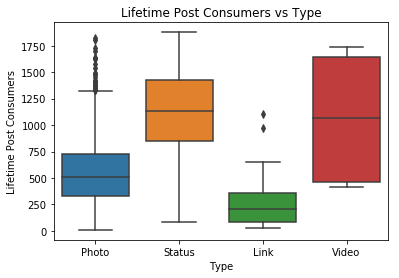

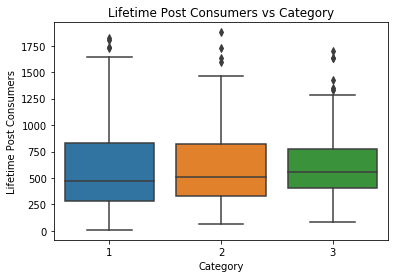

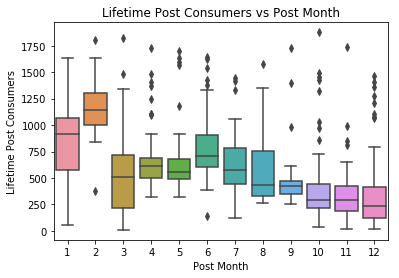

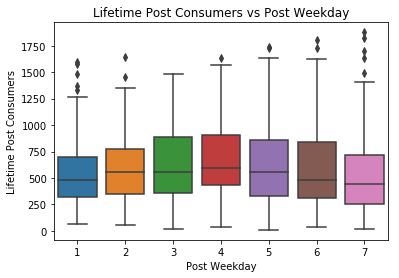

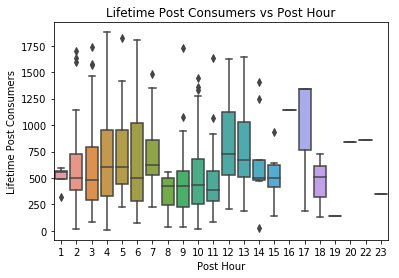

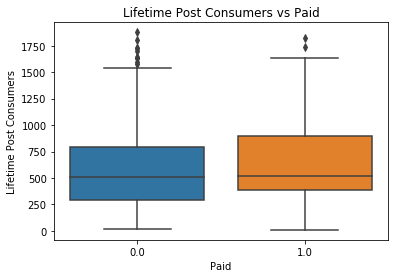

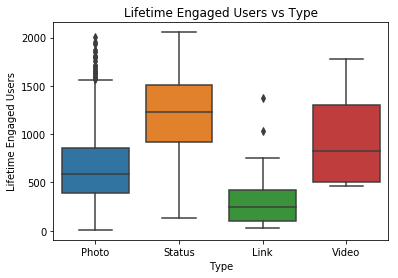

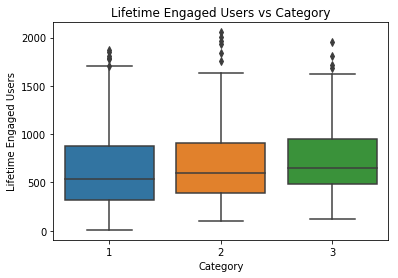

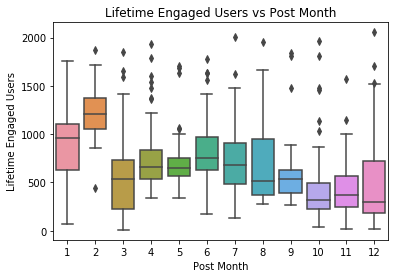

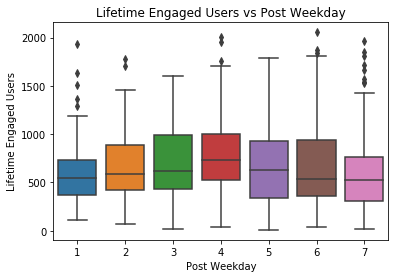

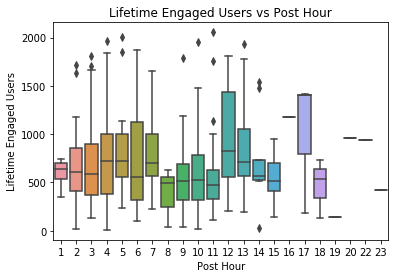

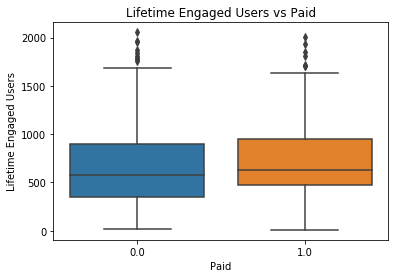

In [10]:
#visualize how attributes affect outcome variables

for outcome in selected_outcomes:
    for col in ['Type','Category','Post Month','Post Weekday','Post Hour','Paid']:
        plt.figure(figsize=(6,4))
        Q3 = df[outcome].quantile(q=0.75)
        IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
        sns.boxplot(x=col,y=outcome,data=df[df[outcome]<=Q3+(1.5*IQR)])
        plt.title("{} vs {}".format(outcome,col))

'Type' and 'Post Month' appear to influence the two outcomes most, with 'Type' = 'Status'/'Video' and 'Post Month' = '1'/'2' having higher outcome values.

There is some variation in outcome values for some of the other features such as 'Post Weekday' and 'Post Hour' but the patterns are not obvious.

'Post Hour' appears to have clusters, e.g. Hours 12-13 / 8-11 appear to be clustered around the same outcome values.

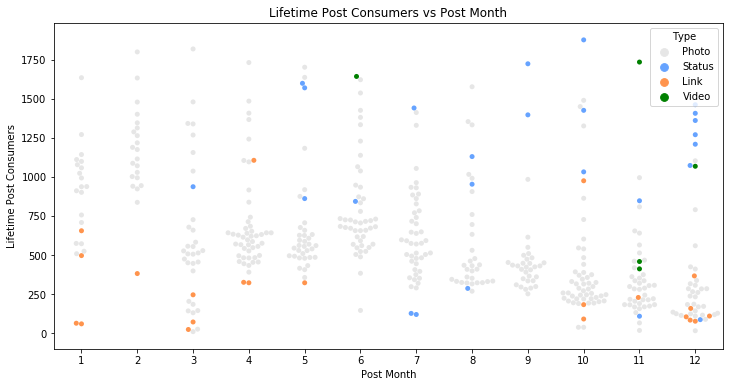

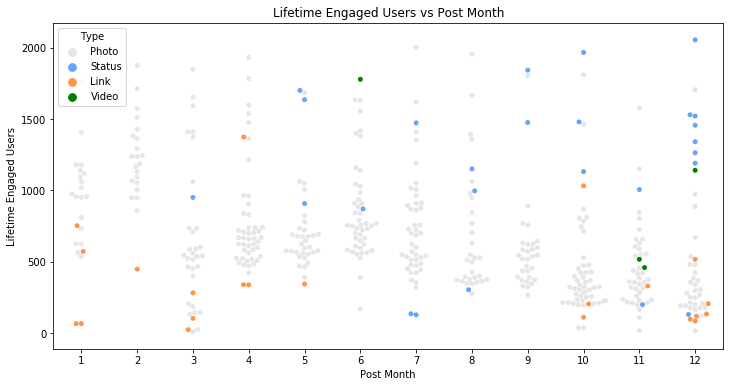

In [11]:
#visualize how 'Post Month' and "Type" affect outcome variables
for outcome in selected_outcomes:
    palette = ['#e6e6e6', '#66a3ff','#ff944d','#008000']
    plt.figure(figsize=(12,6))
    Q3 = df[outcome].quantile(q=0.75)
    IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
    sns.swarmplot(y=outcome, x="Post Month",data=df[df[outcome]<=Q3+(1.5*IQR)], hue="Type", palette=palette)
    plt.title("{} vs Post Month".format(outcome))

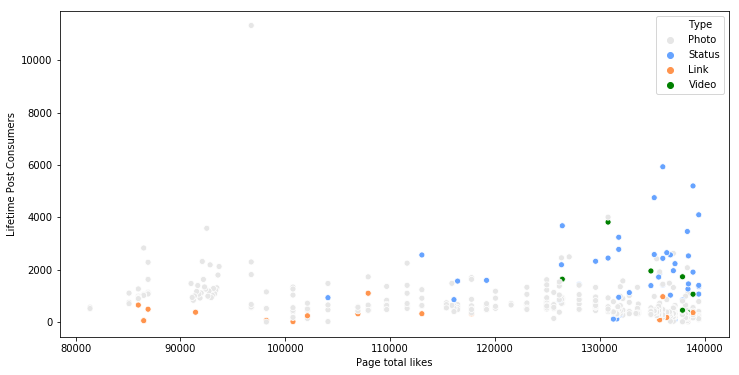

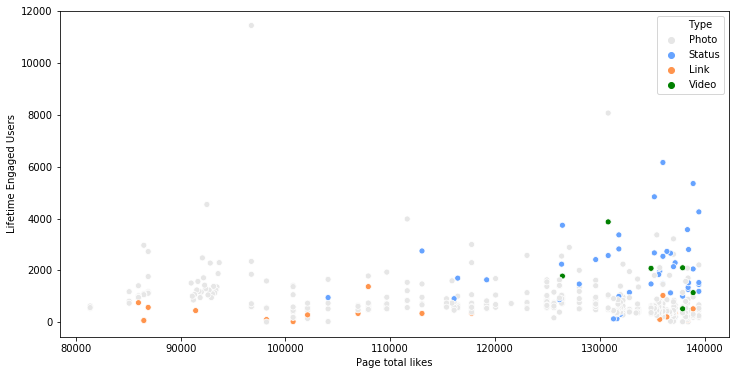

In [12]:
#visualize how 'Page total likes'and "Type" affect outcome variables
for outcome in selected_outcomes:
    palette = ['#e6e6e6', '#66a3ff','#ff944d','#008000']
    plt.figure(figsize=(12,6))
    Q3 = df[outcome].quantile(q=0.75)
    IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
    sns.scatterplot(x='Page total likes', y=outcome, data=df,hue="Type", palette=palette)
    

"Status" posts tend to have better outcomes, and there appears to be a positive correlation between 'Page total likes' and outcomes for posts of this type

"Link" posts tend to have poorer outcomes, while there are very few data points for "Video" which limits its predictive power.

There appears to be an extreme outlier with outcome values of >10000. This data point will be removed before modelling as it will impact on the predictive power of the model

#### Data cleaning/wrangling
##### Missing values

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


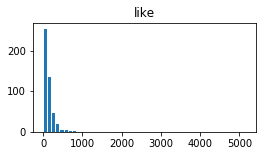

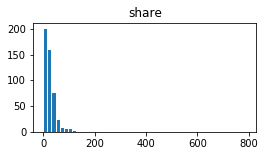

In [13]:
for col in ['like','share']:
    plt.figure(figsize=(4,2))
    plt.hist(df[col], bins=50, edgecolor='white')
    plt.title(col)

In [14]:
df['Paid']=df['Paid'].astype('str')
df['Paid'].value_counts()

0.0    360
1.0    139
nan      1
Name: Paid, dtype: int64

Based on the distributions for the variables with missing values, 'Paid' will be filled with mode and 'like' and 'share' with the median

In [15]:
df['Paid'].replace('nan', df['Paid'].mode().item(), inplace=True)
for outcome in ['like','share']:
    df[outcome].fillna(df[outcome].median(), inplace=True)


##### Feature Engineering
To reduce the number of categorical variables from 'Post Hour', 'Post Weekday' and 'Post Month', new columns will be created to cluster some groups together, based on assumptions on how facebook activity might be affected

'weekday' will be created to differentiate between weekday/weekend
'TimeOfDay' will be created based on the distribution of outcome values by 'Post Hour'; those hours with few or no observations will be grouped together. 
'TImeOfYear' will be created based on the distribution of outcome values by 'Post Month'; 


In [16]:
df['Post Hour'].value_counts()

3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Post Hour, dtype: int64

In [17]:
df['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

In [18]:
#create new features for time of post
df['weekday'] = 1
df.loc[df['Post Weekday']>=6, 'weekday']=0

df['TimeOfDay']=pd.cut(df['Post Hour'], bins=[1,8,12,16,24], right=False, labels=["earlyAM","AM",'earlyPM',"PM_Night"])
df['TimeOfYear']= pd.cut(df['Post Month'], bins=[1,4,7,10,13], right=False, labels=["Q1","Q2",'Q3',"Q4"])


##### Remove extreme outliers
The outlier with 'Lifetime Post Consumers' >10000 was identified as an outlier and will be removed

In [51]:
#df = df[df['Lifetime Post Consumers']<10000]
Q3 = df["Lifetime Post Consumers"].quantile(q=0.75)
IQR = df["Lifetime Post Consumers"].quantile(q=0.75) - df["Lifetime Post Consumers"].quantile(q=0.25)
df = df[df["Lifetime Post Consumers"]<=Q3+(1.5*IQR)]

In [52]:
len(df)

462

#### Model training

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

##### Predicting outcome "Lifetime Post Consumers"

A test set will be held out for final model evaluation. N-fold cross validation with grid search will be used to select the best model on the train set. For the input variables, "Page total likes" is of orders of magnitude higher than the other inputs and will be scaled before inputting into the model

In [69]:
for col in ['Category','Post Month','Post Weekday', 'Post Hour']:
    df[col]=df[col].astype('str')

    
#input_var = ['Page total likes', 'Type', 'Category', 'Paid', 'Post Month','Post Weekday', 'Post Hour']
#input_var = ['Page total likes', 'Type', 'Category', 'Paid', 'weekday', 'TimeOfDay', 'TimeOfYear']

input_var = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'weekday', 'TimeOfDay', 'TimeOfYear']
X = df[input_var]

cat_var = ['Type', 'Category', 'weekday', 'TimeOfDay', 'TimeOfYear', 'Post Month', 'Post Weekday']
#cat_var = ['Type', 'Category', 'Post Month','Post Weekday', 'Post Hour']
X = pd.get_dummies(X, columns=cat_var, drop_first=True)
y = df["Lifetime Post Consumers"]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)

In [71]:
#scale inputs
scalerX = MinMaxScaler().fit(X_train)

X_train_scaled = scalerX.transform(X_train)
len(X)

462

In [72]:
linearmodel = LinearRegression()
linearmodel.fit(X_train_scaled,y_train)

pred_train = linearmodel.predict(X_train_scaled)
print("MSE:{},R2:{},MAE:{}".format(mean_squared_error(y_train,pred_train),r2_score(y_train,pred_train),
                                   mean_absolute_error(y_train,pred_train)))

pred_test = linearmodel.predict(scalerX.transform(X_test))
print("MSE:{},R2:{},MAE:{}".format(mean_squared_error(y_test,pred_test),r2_score(y_test,pred_test),
                                   mean_absolute_error(y_test,pred_test)))
mse_percent = sum((abs(y_test - pred_test)/y_test)*100/len(pred_test))
print("MSE Percentage {}".format(mse_percent))

MSE:92063.36653495158,R2:0.4518781740246741,MAE:220.71228466796282
MSE:112989.14642216825,R2:0.20114001778421065,MAE:234.548120589475
MSE Percentage 78.57202984630862


In [73]:
pd.Series(linearmodel.coef_, index=X.columns).sort_values(ascending=False)

Type_Status           992.800166
Type_Video            927.951040
Post Month_2          349.185882
Type_Photo            329.011100
TimeOfDay_PM_Night    132.467211
TimeOfDay_earlyPM      47.295416
Post Weekday_2         45.989925
Post Month_6           45.341667
Post Weekday_4         44.900948
Paid                   28.200005
Post Weekday_7         26.459735
Post Month_8           16.801821
Post Weekday_5         13.595386
weekday_1              -8.918240
Post Weekday_6        -17.541495
Page total likes      -34.512985
Post Month_4          -40.079249
Post Weekday_3        -59.372751
Post Month_10         -59.888920
Post Month_12         -60.792884
TimeOfYear_Q2         -76.775019
Post Month_5          -82.037437
Post Month_7          -83.200446
TimeOfDay_AM          -86.902285
Category_3            -92.694428
Category_2           -103.369040
Post Month_9         -120.593852
TimeOfYear_Q3        -186.992477
Post Month_11        -198.398744
TimeOfYear_Q4        -319.080548
Post Month

In [74]:
rfmodel = RandomForestRegressor(n_estimators=500, min_samples_split=8)
rfmodel.fit(X_train_scaled,y_train)

pred_train = rfmodel.predict(X_train_scaled)
print("MSE:{},R2:{},MAE:{}".format(mean_squared_error(y_train,pred_train),r2_score(y_train,pred_train),
                                   mean_absolute_error(y_train,pred_train)))

pred_test = rfmodel.predict(scalerX.transform(X_test))
print("MSE:{},R2:{},MAE:{}".format(mean_squared_error(y_test,pred_test),r2_score(y_test,pred_test),
                                   mean_absolute_error(y_test,pred_test)))
mse_percent = sum((abs(y_test - pred_test)/y_test)*100/len(pred_test))
print("MSE Percentage {}".format(mse_percent))

MSE:48972.55542792091,R2:0.7084298835233336,MAE:154.5833296140094
MSE:99942.43016771502,R2:0.29338338668324404,MAE:223.45027582190443
MSE Percentage 63.440529806495825


In [75]:
pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

Page total likes      0.325620
Type_Status           0.163100
Post Month_2          0.097011
Type_Photo            0.046639
Type_Video            0.039920
TimeOfDay_earlyPM     0.029878
Post Weekday_2        0.022852
Post Month_3          0.022682
Category_3            0.022208
Post Weekday_4        0.021720
Post Weekday_5        0.021168
Paid                  0.021151
Post Month_7          0.019361
Category_2            0.019192
TimeOfDay_AM          0.015720
Post Month_6          0.014256
Post Weekday_6        0.013881
Post Weekday_7        0.013073
weekday_1             0.012236
TimeOfYear_Q2         0.009452
TimeOfDay_PM_Night    0.007535
Post Month_10         0.007406
Post Weekday_3        0.006326
Post Month_8          0.006002
Post Month_5          0.005020
Post Month_11         0.004751
Post Month_4          0.004336
Post Month_9          0.003263
TimeOfYear_Q3         0.002130
TimeOfYear_Q4         0.001171
Post Month_12         0.000941
dtype: float64

In [76]:
outcome = "Lifetime Post Consumers"
rf_model = RandomForestRegressor(random_state=77)
svr_model = SVR()
linear_model = LinearRegression()
sgd_model = SGDRegressor(max_iter=5000)
lasso = Lasso(alpha=0.9)

for model,name in zip([rf_model,svr_model,linear_model,sgd_model, lasso],['rf','svr','linear','sgd','lasso']):
    print("For {}".format(name))
    model.fit(X_train_scaled,y_train)
    pred = model.predict(scalerX.transform(X_test))

    MSE = mean_squared_error(y_test,pred_test)
    MAE = mean_absolute_error(y_test,pred)
    r2 = r2_score(y_test,pred)
    maep = sum((abs(y_test - pred)/y_test)*100/len(pred))
    print("MSE:{},R2:{},MAE:{}".format(MSE, r2, MAE))
    print("MSE Percentage {}\n".format(maep))

For rf
MSE:99942.43016771502,R2:0.20703658139171566,MAE:233.1083932853717
MSE Percentage 67.34681924033966

For svr
MSE:99942.43016771502,R2:-0.03181805521548142,MAE:279.56012327154514
MSE Percentage 98.02538064148344

For linear
MSE:99942.43016771502,R2:0.20114001778421065,MAE:234.548120589475
MSE Percentage 78.57202984630862

For sgd
MSE:99942.43016771502,R2:0.20111557386341083,MAE:235.29865863495866
MSE Percentage 78.92395421530173

For lasso
MSE:99942.43016771502,R2:0.21552459013045744,MAE:235.36685390549698
MSE Percentage 78.4183408015069



In [77]:
import warnings
warnings.filterwarnings("ignore")

pipeline = Pipeline([('scaler', MinMaxScaler()),('lasso', Lasso())])

params = {'lasso__alpha': np.linspace(0.01,0.5,10) }
lasso_model = GridSearchCV(pipeline, params, cv=KFold(n_splits = 5, random_state=77), scoring='neg_mean_absolute_error')
lasso_model.fit(X_train,y_train)
    
print(lasso_model.best_score_)
print(lasso_model.best_params_)

pred = lasso_model.predict(X_test)
    
MSE = mean_squared_error(y_test,pred_test)
MAE = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)
maep = sum((abs(y_test - pred)/y_test)*100/len(pred))
print("MSE:{},R2:{},MAE:{}".format(MSE, r2, MAE))
print("MSE Percentage {}\n".format(maep))


-251.8362328371647
{'lasso__alpha': 0.11888888888888888}
MSE:99942.43016771502,R2:0.20288673217676545,MAE:235.15145503675228
MSE Percentage 78.6190334842733



In [78]:

pipeline = Pipeline([('scaler', MinMaxScaler()),('rf', RandomForestRegressor(random_state=77))])

params = {'rf__n_estimators': np.arange(100,500,100)}
rf_model = GridSearchCV(pipeline, params, cv=KFold(n_splits = 5, random_state=77), scoring='neg_mean_absolute_error')
rf_model.fit(X_train,y_train)
    
print(rf_model.best_score_)
print(rf_model.best_params_)

pred = rf_model.predict(X_test)
    
MSE = mean_squared_error(y_test,pred_test)
MAE = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)
maep = sum((abs(y_test - pred)/y_test)*100/len(pred))
print("MSE:{},R2:{},MAE:{}".format(MSE, r2, MAE))
print("MSE Percentage {}\n".format(maep))


-252.7550032065458
{'rf__n_estimators': 300}
MSE:99942.43016771502,R2:0.25167888553429907,MAE:228.92429493548016
MSE Percentage 63.87334434852991

